# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secret']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_token_secret']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [10]:
client = MongoClient(mongod_connect)
db = client.gp9 # use or create a database named demo
tweet_collection = db.lab10 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [13]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [14]:
track = ['covid-19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [15]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1325297031611478018
1325297034929172480
1325297037223583745
1325297037756272640
1325297038670618624
1325297039110934528
1325297038922194944
1325297039861714944
1325297041031925761
1325297041493331968
1325297042118348805
1325297043108106240
1325297043611422720
1325297043863179266
1325297045540892672
1325297047319306240
1325297047390523394
1325297047528935424
1325297047776468992
1325297048510402560
1325297048745173004
1325297051408588800
1325297051052204032
1325297056013901824
1325297058367090690
1325297058996236288
1325297059071553537
1325297068148215808
1325297068148101121
1325297070173945856
1325297071667073024
1325297071407198208
1325297072543682561
1325297073076441088
1325297074104045568
1325297075395973120
1325297086523432960
1325297088066805760
1325297091350966274
1325297091766181891
1325297092500336641
1325297096266711042
1325297096811974657
1325297098292670466
1325297098846208001
1325297102306508800
1325297102902030336
1325297104043044866
1325297107578753025
1325297107922636800


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [18]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [19]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid-19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [20]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Sun Nov 08 04:42:36 +0000 2020'
'Sun Nov 08 04:42:35 +0000 2020'
'Sun Nov 08 04:42:34 +0000 2020'
'Sun Nov 08 04:42:33 +0000 2020'
'Sun Nov 08 04:42:33 +0000 2020'
'Sun Nov 08 04:42:33 +0000 2020'
'Sun Nov 08 04:42:33 +0000 2020'
'Sun Nov 08 04:42:33 +0000 2020'
'Sun Nov 08 04:42:33 +0000 2020'
'Sun Nov 08 04:42:33 +0000 2020'
'Sun Nov 08 04:42:32 +0000 2020'
'Sun Nov 08 04:42:32 +0000 2020'
'Sun Nov 08 04:42:32 +0000 2020'
'Sun Nov 08 04:42:32 +0000 2020'
'Sun Nov 08 04:42:32 +0000 2020'
'Sun Nov 08 04:42:31 +0000 2020'
'Sun Nov 08 04:42:31 +0000 2020'
'Sun Nov 08 04:42:28 +0000 2020'
'Sun Nov 08 04:42:28 +0000 2020'
'Sun Nov 08 04:42:28 +0000 2020'
'Sun Nov 08 04:42:27 +0000 2020'
'Sun Nov 08 04:42:27 +0000 2020'
'Sun Nov 08 04:42:27 +0000 2020'
'Sun Nov 08 04:42:26 +0000 2020'
'Sun Nov 08 04:42:25 +0000 2020'
'Sun Nov 08 04:42:25 +0000 2020'
'Sun Nov 08 04:42:25 +0000 2020'
'Sun Nov 08 04:42:24 +0000 2020'
'Sun Nov 08 04:42:24 +0000 2020'
'Sun Nov 08 04:42:24 +0000 2020'
'Sun Nov 0

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [21]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Sun Nov 08 04:42:03 +0000 2020'
'Sun Nov 08 04:42:02 +0000 2020'
'Sun Nov 08 04:42:02 +0000 2020'
'Sun Nov 08 04:42:01 +0000 2020'
'Sun Nov 08 04:42:01 +0000 2020'
'Sun Nov 08 04:42:00 +0000 2020'
'Sun Nov 08 04:42:00 +0000 2020'
'Sun Nov 08 04:42:00 +0000 2020'
'Sun Nov 08 04:42:00 +0000 2020'
'Sun Nov 08 04:41:59 +0000 2020'
'Sun Nov 08 04:41:59 +0000 2020'
'Sun Nov 08 04:41:59 +0000 2020'
'Sun Nov 08 04:41:59 +0000 2020'
'Sun Nov 08 04:41:58 +0000 2020'
'Sun Nov 08 04:41:58 +0000 2020'
'Sun Nov 08 04:41:57 +0000 2020'
'Sun Nov 08 04:41:57 +0000 2020'
'Sun Nov 08 04:41:57 +0000 2020'
'Sun Nov 08 04:41:57 +0000 2020'
'Sun Nov 08 04:41:57 +0000 2020'
'Sun Nov 08 04:41:56 +0000 2020'
'Sun Nov 08 04:41:56 +0000 2020'
'Sun Nov 08 04:41:55 +0000 2020'
'Sun Nov 08 04:41:55 +0000 2020'
'Sun Nov 08 04:41:55 +0000 2020'
'Sun Nov 08 04:41:54 +0000 2020'
'Sun Nov 08 04:41:54 +0000 2020'
'Sun Nov 08 04:41:54 +0000 2020'
'Sun Nov 08 04:41:54 +0000 2020'
'Sun Nov 08 04:41:54 +0000 2020'
'Sun Nov 0

'Sun Nov 08 04:40:29 +0000 2020'
'Sun Nov 08 04:40:28 +0000 2020'
'Sun Nov 08 04:40:28 +0000 2020'
'Sun Nov 08 04:40:27 +0000 2020'
'Sun Nov 08 04:40:26 +0000 2020'
'Sun Nov 08 04:40:26 +0000 2020'
'Sun Nov 08 04:40:25 +0000 2020'
'Sun Nov 08 04:40:25 +0000 2020'
'Sun Nov 08 04:40:25 +0000 2020'
'Sun Nov 08 04:40:22 +0000 2020'
'Sun Nov 08 04:40:22 +0000 2020'
'Sun Nov 08 04:40:22 +0000 2020'
'Sun Nov 08 04:40:22 +0000 2020'
'Sun Nov 08 04:40:21 +0000 2020'
'Sun Nov 08 04:40:21 +0000 2020'
'Sun Nov 08 04:40:20 +0000 2020'
'Sun Nov 08 04:40:19 +0000 2020'
'Sun Nov 08 04:40:19 +0000 2020'
'Sun Nov 08 04:40:17 +0000 2020'
'Sun Nov 08 04:40:17 +0000 2020'
'Sun Nov 08 04:40:17 +0000 2020'
'Sun Nov 08 04:40:17 +0000 2020'
'Sun Nov 08 04:40:16 +0000 2020'
'Sun Nov 08 04:40:16 +0000 2020'
'Sun Nov 08 04:40:15 +0000 2020'
'Sun Nov 08 04:40:15 +0000 2020'
'Sun Nov 08 04:40:15 +0000 2020'
'Sun Nov 08 04:40:14 +0000 2020'
'Sun Nov 08 04:40:13 +0000 2020'
'Sun Nov 08 04:40:13 +0000 2020'
'Sun Nov 0

'Sun Nov 08 04:39:06 +0000 2020'
'Sun Nov 08 04:39:06 +0000 2020'
'Sun Nov 08 04:39:06 +0000 2020'
'Sun Nov 08 04:39:04 +0000 2020'
'Sun Nov 08 04:39:04 +0000 2020'
'Sun Nov 08 04:39:03 +0000 2020'
'Sun Nov 08 04:39:03 +0000 2020'
'Sun Nov 08 04:39:02 +0000 2020'
'Sun Nov 08 04:39:02 +0000 2020'
'Sun Nov 08 04:39:02 +0000 2020'
'Sun Nov 08 04:39:02 +0000 2020'
'Sun Nov 08 04:39:01 +0000 2020'
'Sun Nov 08 04:39:01 +0000 2020'
'Sun Nov 08 04:39:01 +0000 2020'
'Sun Nov 08 04:39:00 +0000 2020'
'Sun Nov 08 04:39:00 +0000 2020'
'Sun Nov 08 04:38:59 +0000 2020'
'Sun Nov 08 04:38:59 +0000 2020'
'Sun Nov 08 04:38:59 +0000 2020'
'Sun Nov 08 04:38:59 +0000 2020'
'Sun Nov 08 04:38:59 +0000 2020'
'Sun Nov 08 04:38:59 +0000 2020'
'Sun Nov 08 04:38:58 +0000 2020'
'Sun Nov 08 04:38:58 +0000 2020'
'Sun Nov 08 04:38:58 +0000 2020'
'Sun Nov 08 04:38:58 +0000 2020'
'Sun Nov 08 04:38:58 +0000 2020'
'Sun Nov 08 04:38:57 +0000 2020'
'Sun Nov 08 04:38:57 +0000 2020'
'Sun Nov 08 04:38:57 +0000 2020'
'Sun Nov 0

'Sun Nov 08 04:37:49 +0000 2020'
'Sun Nov 08 04:37:49 +0000 2020'
'Sun Nov 08 04:37:49 +0000 2020'
'Sun Nov 08 04:37:49 +0000 2020'
'Sun Nov 08 04:37:48 +0000 2020'
'Sun Nov 08 04:37:48 +0000 2020'
'Sun Nov 08 04:37:47 +0000 2020'
'Sun Nov 08 04:37:47 +0000 2020'
'Sun Nov 08 04:37:47 +0000 2020'
'Sun Nov 08 04:37:47 +0000 2020'
'Sun Nov 08 04:37:47 +0000 2020'
'Sun Nov 08 04:37:47 +0000 2020'
'Sun Nov 08 04:37:46 +0000 2020'
'Sun Nov 08 04:37:46 +0000 2020'
'Sun Nov 08 04:37:46 +0000 2020'
'Sun Nov 08 04:37:46 +0000 2020'
'Sun Nov 08 04:37:46 +0000 2020'
'Sun Nov 08 04:37:46 +0000 2020'
'Sun Nov 08 04:37:45 +0000 2020'
'Sun Nov 08 04:37:45 +0000 2020'
'Sun Nov 08 04:37:45 +0000 2020'
'Sun Nov 08 04:37:45 +0000 2020'
'Sun Nov 08 04:37:45 +0000 2020'
'Sun Nov 08 04:37:45 +0000 2020'
'Sun Nov 08 04:37:44 +0000 2020'
'Sun Nov 08 04:37:44 +0000 2020'
'Sun Nov 08 04:37:44 +0000 2020'
'Sun Nov 08 04:37:43 +0000 2020'
'Sun Nov 08 04:37:43 +0000 2020'
'Sun Nov 08 04:37:42 +0000 2020'
'Sun Nov 0

'Sun Nov 08 04:36:20 +0000 2020'
'Sun Nov 08 04:36:20 +0000 2020'
'Sun Nov 08 04:36:19 +0000 2020'
'Sun Nov 08 04:36:18 +0000 2020'
'Sun Nov 08 04:36:18 +0000 2020'
'Sun Nov 08 04:36:17 +0000 2020'
'Sun Nov 08 04:36:17 +0000 2020'
'Sun Nov 08 04:36:17 +0000 2020'
'Sun Nov 08 04:36:17 +0000 2020'
'Sun Nov 08 04:36:17 +0000 2020'
'Sun Nov 08 04:36:16 +0000 2020'
'Sun Nov 08 04:36:16 +0000 2020'
'Sun Nov 08 04:36:14 +0000 2020'
'Sun Nov 08 04:36:14 +0000 2020'
'Sun Nov 08 04:36:14 +0000 2020'
'Sun Nov 08 04:36:14 +0000 2020'
'Sun Nov 08 04:36:14 +0000 2020'
'Sun Nov 08 04:36:13 +0000 2020'
'Sun Nov 08 04:36:13 +0000 2020'
'Sun Nov 08 04:36:13 +0000 2020'
'Sun Nov 08 04:36:13 +0000 2020'
'Sun Nov 08 04:36:13 +0000 2020'
'Sun Nov 08 04:36:13 +0000 2020'
'Sun Nov 08 04:36:13 +0000 2020'
'Sun Nov 08 04:36:13 +0000 2020'
'Sun Nov 08 04:36:12 +0000 2020'
'Sun Nov 08 04:36:12 +0000 2020'
'Sun Nov 08 04:36:12 +0000 2020'
'Sun Nov 08 04:36:12 +0000 2020'
'Sun Nov 08 04:36:11 +0000 2020'
'Sun Nov 0

'Sun Nov 08 04:35:02 +0000 2020'
'Sun Nov 08 04:35:02 +0000 2020'
'Sun Nov 08 04:35:02 +0000 2020'
'Sun Nov 08 04:35:02 +0000 2020'
'Sun Nov 08 04:35:02 +0000 2020'
'Sun Nov 08 04:35:02 +0000 2020'
'Sun Nov 08 04:35:02 +0000 2020'
'Sun Nov 08 04:35:01 +0000 2020'
'Sun Nov 08 04:35:01 +0000 2020'
'Sun Nov 08 04:35:01 +0000 2020'
'Sun Nov 08 04:35:01 +0000 2020'
'Sun Nov 08 04:35:01 +0000 2020'
'Sun Nov 08 04:35:01 +0000 2020'
'Sun Nov 08 04:35:00 +0000 2020'
'Sun Nov 08 04:35:00 +0000 2020'
'Sun Nov 08 04:35:00 +0000 2020'
'Sun Nov 08 04:35:00 +0000 2020'
'Sun Nov 08 04:34:59 +0000 2020'
'Sun Nov 08 04:34:59 +0000 2020'
'Sun Nov 08 04:34:59 +0000 2020'
'Sun Nov 08 04:34:59 +0000 2020'
'Sun Nov 08 04:34:58 +0000 2020'
'Sun Nov 08 04:34:58 +0000 2020'
'Sun Nov 08 04:34:58 +0000 2020'
'Sun Nov 08 04:34:58 +0000 2020'
'Sun Nov 08 04:34:58 +0000 2020'
'Sun Nov 08 04:34:57 +0000 2020'
'Sun Nov 08 04:34:57 +0000 2020'
'Sun Nov 08 04:34:57 +0000 2020'
'Sun Nov 08 04:34:57 +0000 2020'
'Sun Nov 0

'Sun Nov 08 04:33:38 +0000 2020'
'Sun Nov 08 04:33:37 +0000 2020'
'Sun Nov 08 04:33:36 +0000 2020'
'Sun Nov 08 04:33:36 +0000 2020'
'Sun Nov 08 04:33:35 +0000 2020'
'Sun Nov 08 04:33:35 +0000 2020'
'Sun Nov 08 04:33:34 +0000 2020'
'Sun Nov 08 04:33:34 +0000 2020'
'Sun Nov 08 04:33:34 +0000 2020'
'Sun Nov 08 04:33:34 +0000 2020'
'Sun Nov 08 04:33:33 +0000 2020'
'Sun Nov 08 04:33:33 +0000 2020'
'Sun Nov 08 04:33:33 +0000 2020'
'Sun Nov 08 04:33:33 +0000 2020'
'Sun Nov 08 04:33:32 +0000 2020'
'Sun Nov 08 04:33:31 +0000 2020'
'Sun Nov 08 04:33:31 +0000 2020'
'Sun Nov 08 04:33:30 +0000 2020'
'Sun Nov 08 04:33:30 +0000 2020'
'Sun Nov 08 04:33:30 +0000 2020'
'Sun Nov 08 04:33:30 +0000 2020'
'Sun Nov 08 04:33:29 +0000 2020'
'Sun Nov 08 04:33:29 +0000 2020'
'Sun Nov 08 04:33:29 +0000 2020'
'Sun Nov 08 04:33:29 +0000 2020'
'Sun Nov 08 04:33:27 +0000 2020'
'Sun Nov 08 04:33:27 +0000 2020'
'Sun Nov 08 04:33:26 +0000 2020'
'Sun Nov 08 04:33:26 +0000 2020'
'Sun Nov 08 04:33:25 +0000 2020'
'Sun Nov 0

'Sun Nov 08 04:32:16 +0000 2020'
'Sun Nov 08 04:32:16 +0000 2020'
'Sun Nov 08 04:32:15 +0000 2020'
'Sun Nov 08 04:32:14 +0000 2020'
'Sun Nov 08 04:32:14 +0000 2020'
'Sun Nov 08 04:32:14 +0000 2020'
'Sun Nov 08 04:32:14 +0000 2020'
'Sun Nov 08 04:32:13 +0000 2020'
'Sun Nov 08 04:32:13 +0000 2020'
'Sun Nov 08 04:32:12 +0000 2020'
'Sun Nov 08 04:32:12 +0000 2020'
'Sun Nov 08 04:32:12 +0000 2020'
'Sun Nov 08 04:32:12 +0000 2020'
'Sun Nov 08 04:32:12 +0000 2020'
'Sun Nov 08 04:32:11 +0000 2020'
'Sun Nov 08 04:32:11 +0000 2020'
'Sun Nov 08 04:32:11 +0000 2020'
'Sun Nov 08 04:32:11 +0000 2020'
'Sun Nov 08 04:32:11 +0000 2020'
'Sun Nov 08 04:32:10 +0000 2020'
'Sun Nov 08 04:32:10 +0000 2020'
'Sun Nov 08 04:32:09 +0000 2020'
'Sun Nov 08 04:32:09 +0000 2020'
'Sun Nov 08 04:32:09 +0000 2020'
'Sun Nov 08 04:32:09 +0000 2020'
'Sun Nov 08 04:32:09 +0000 2020'
'Sun Nov 08 04:32:09 +0000 2020'
'Sun Nov 08 04:32:08 +0000 2020'
'Sun Nov 08 04:32:08 +0000 2020'
'Sun Nov 08 04:32:07 +0000 2020'
'Sun Nov 0

'Sun Nov 08 04:30:58 +0000 2020'
'Sun Nov 08 04:30:58 +0000 2020'
'Sun Nov 08 04:30:57 +0000 2020'
'Sun Nov 08 04:30:56 +0000 2020'
'Sun Nov 08 04:30:56 +0000 2020'
'Sun Nov 08 04:30:56 +0000 2020'
'Sun Nov 08 04:30:54 +0000 2020'
'Sun Nov 08 04:30:54 +0000 2020'
'Sun Nov 08 04:30:54 +0000 2020'
'Sun Nov 08 04:30:54 +0000 2020'
'Sun Nov 08 04:30:54 +0000 2020'
'Sun Nov 08 04:30:53 +0000 2020'
'Sun Nov 08 04:30:53 +0000 2020'
'Sun Nov 08 04:30:53 +0000 2020'
'Sun Nov 08 04:30:51 +0000 2020'
'Sun Nov 08 04:30:51 +0000 2020'
'Sun Nov 08 04:30:50 +0000 2020'
'Sun Nov 08 04:30:50 +0000 2020'
'Sun Nov 08 04:30:50 +0000 2020'
'Sun Nov 08 04:30:49 +0000 2020'
'Sun Nov 08 04:30:49 +0000 2020'
'Sun Nov 08 04:30:49 +0000 2020'
'Sun Nov 08 04:30:49 +0000 2020'
'Sun Nov 08 04:30:48 +0000 2020'
'Sun Nov 08 04:30:48 +0000 2020'
'Sun Nov 08 04:30:48 +0000 2020'
'Sun Nov 08 04:30:46 +0000 2020'
'Sun Nov 08 04:30:46 +0000 2020'
'Sun Nov 08 04:30:44 +0000 2020'
'Sun Nov 08 04:30:44 +0000 2020'
'Sun Nov 0

'Sun Nov 08 04:29:38 +0000 2020'
'Sun Nov 08 04:29:37 +0000 2020'
'Sun Nov 08 04:29:37 +0000 2020'
'Sun Nov 08 04:29:37 +0000 2020'
'Sun Nov 08 04:29:37 +0000 2020'
'Sun Nov 08 04:29:37 +0000 2020'
'Sun Nov 08 04:29:37 +0000 2020'
'Sun Nov 08 04:29:37 +0000 2020'
'Sun Nov 08 04:29:37 +0000 2020'
'Sun Nov 08 04:29:37 +0000 2020'
'Sun Nov 08 04:29:37 +0000 2020'
'Sun Nov 08 04:29:36 +0000 2020'
'Sun Nov 08 04:29:35 +0000 2020'
'Sun Nov 08 04:29:35 +0000 2020'
'Sun Nov 08 04:29:34 +0000 2020'
'Sun Nov 08 04:29:34 +0000 2020'
'Sun Nov 08 04:29:34 +0000 2020'
'Sun Nov 08 04:29:34 +0000 2020'
'Sun Nov 08 04:29:34 +0000 2020'
'Sun Nov 08 04:29:33 +0000 2020'
'Sun Nov 08 04:29:33 +0000 2020'
'Sun Nov 08 04:29:33 +0000 2020'
'Sun Nov 08 04:29:33 +0000 2020'
'Sun Nov 08 04:29:33 +0000 2020'
'Sun Nov 08 04:29:33 +0000 2020'
'Sun Nov 08 04:29:32 +0000 2020'
'Sun Nov 08 04:29:32 +0000 2020'
'Sun Nov 08 04:29:32 +0000 2020'
'Sun Nov 08 04:29:31 +0000 2020'
'Sun Nov 08 04:29:31 +0000 2020'
'Sun Nov 0

'Sun Nov 08 04:28:14 +0000 2020'
'Sun Nov 08 04:28:14 +0000 2020'
'Sun Nov 08 04:28:14 +0000 2020'
'Sun Nov 08 04:28:13 +0000 2020'
'Sun Nov 08 04:28:13 +0000 2020'
'Sun Nov 08 04:28:13 +0000 2020'
'Sun Nov 08 04:28:12 +0000 2020'
'Sun Nov 08 04:28:12 +0000 2020'
'Sun Nov 08 04:28:12 +0000 2020'
'Sun Nov 08 04:28:12 +0000 2020'
'Sun Nov 08 04:28:12 +0000 2020'
'Sun Nov 08 04:28:11 +0000 2020'
'Sun Nov 08 04:28:10 +0000 2020'
'Sun Nov 08 04:28:09 +0000 2020'
'Sun Nov 08 04:28:09 +0000 2020'
'Sun Nov 08 04:28:08 +0000 2020'
'Sun Nov 08 04:28:08 +0000 2020'
'Sun Nov 08 04:28:08 +0000 2020'
'Sun Nov 08 04:28:07 +0000 2020'
'Sun Nov 08 04:28:07 +0000 2020'
'Sun Nov 08 04:28:07 +0000 2020'
'Sun Nov 08 04:28:07 +0000 2020'
'Sun Nov 08 04:28:06 +0000 2020'
'Sun Nov 08 04:28:06 +0000 2020'
'Sun Nov 08 04:28:05 +0000 2020'
'Sun Nov 08 04:28:05 +0000 2020'
'Sun Nov 08 04:28:05 +0000 2020'
'Sun Nov 08 04:28:05 +0000 2020'
'Sun Nov 08 04:28:04 +0000 2020'
'Sun Nov 08 04:28:04 +0000 2020'
'Sun Nov 0

'Sun Nov 08 04:26:43 +0000 2020'
'Sun Nov 08 04:26:43 +0000 2020'
'Sun Nov 08 04:26:43 +0000 2020'
'Sun Nov 08 04:26:42 +0000 2020'
'Sun Nov 08 04:26:42 +0000 2020'
'Sun Nov 08 04:26:42 +0000 2020'
'Sun Nov 08 04:26:42 +0000 2020'
'Sun Nov 08 04:26:42 +0000 2020'
'Sun Nov 08 04:26:42 +0000 2020'
'Sun Nov 08 04:26:42 +0000 2020'
'Sun Nov 08 04:26:41 +0000 2020'
'Sun Nov 08 04:26:41 +0000 2020'
'Sun Nov 08 04:26:41 +0000 2020'
'Sun Nov 08 04:26:41 +0000 2020'
'Sun Nov 08 04:26:40 +0000 2020'
'Sun Nov 08 04:26:40 +0000 2020'
'Sun Nov 08 04:26:40 +0000 2020'
'Sun Nov 08 04:26:40 +0000 2020'
'Sun Nov 08 04:26:39 +0000 2020'
'Sun Nov 08 04:26:39 +0000 2020'
'Sun Nov 08 04:26:38 +0000 2020'
'Sun Nov 08 04:26:38 +0000 2020'
'Sun Nov 08 04:26:38 +0000 2020'
'Sun Nov 08 04:26:38 +0000 2020'
'Sun Nov 08 04:26:38 +0000 2020'
'Sun Nov 08 04:26:38 +0000 2020'
'Sun Nov 08 04:26:38 +0000 2020'
'Sun Nov 08 04:26:37 +0000 2020'
'Sun Nov 08 04:26:37 +0000 2020'
'Sun Nov 08 04:26:37 +0000 2020'
'Sun Nov 0

'Sun Nov 08 04:25:19 +0000 2020'
'Sun Nov 08 04:25:19 +0000 2020'
'Sun Nov 08 04:25:19 +0000 2020'
'Sun Nov 08 04:25:18 +0000 2020'
'Sun Nov 08 04:25:17 +0000 2020'
'Sun Nov 08 04:25:17 +0000 2020'
'Sun Nov 08 04:25:17 +0000 2020'
'Sun Nov 08 04:25:17 +0000 2020'
'Sun Nov 08 04:25:17 +0000 2020'
'Sun Nov 08 04:25:16 +0000 2020'
'Sun Nov 08 04:25:16 +0000 2020'
'Sun Nov 08 04:25:16 +0000 2020'
'Sun Nov 08 04:25:15 +0000 2020'
'Sun Nov 08 04:25:15 +0000 2020'
'Sun Nov 08 04:25:14 +0000 2020'
'Sun Nov 08 04:25:13 +0000 2020'
'Sun Nov 08 04:25:13 +0000 2020'
'Sun Nov 08 04:25:13 +0000 2020'
'Sun Nov 08 04:25:13 +0000 2020'
'Sun Nov 08 04:25:13 +0000 2020'
'Sun Nov 08 04:25:12 +0000 2020'
'Sun Nov 08 04:25:12 +0000 2020'
'Sun Nov 08 04:25:12 +0000 2020'
'Sun Nov 08 04:25:12 +0000 2020'
'Sun Nov 08 04:25:12 +0000 2020'
'Sun Nov 08 04:25:11 +0000 2020'
'Sun Nov 08 04:25:11 +0000 2020'
'Sun Nov 08 04:25:11 +0000 2020'
'Sun Nov 08 04:25:10 +0000 2020'
'Sun Nov 08 04:25:10 +0000 2020'
'Sun Nov 0

'Sun Nov 08 04:23:57 +0000 2020'
'Sun Nov 08 04:23:57 +0000 2020'
'Sun Nov 08 04:23:57 +0000 2020'
'Sun Nov 08 04:23:57 +0000 2020'
'Sun Nov 08 04:23:56 +0000 2020'
'Sun Nov 08 04:23:56 +0000 2020'
'Sun Nov 08 04:23:54 +0000 2020'
'Sun Nov 08 04:23:54 +0000 2020'
'Sun Nov 08 04:23:53 +0000 2020'
'Sun Nov 08 04:23:53 +0000 2020'
'Sun Nov 08 04:23:53 +0000 2020'
'Sun Nov 08 04:23:53 +0000 2020'
'Sun Nov 08 04:23:52 +0000 2020'
'Sun Nov 08 04:23:52 +0000 2020'
'Sun Nov 08 04:23:52 +0000 2020'
'Sun Nov 08 04:23:52 +0000 2020'
'Sun Nov 08 04:23:52 +0000 2020'
'Sun Nov 08 04:23:52 +0000 2020'
'Sun Nov 08 04:23:51 +0000 2020'
'Sun Nov 08 04:23:51 +0000 2020'
'Sun Nov 08 04:23:51 +0000 2020'
'Sun Nov 08 04:23:51 +0000 2020'
'Sun Nov 08 04:23:51 +0000 2020'
'Sun Nov 08 04:23:51 +0000 2020'
'Sun Nov 08 04:23:50 +0000 2020'
'Sun Nov 08 04:23:50 +0000 2020'
'Sun Nov 08 04:23:50 +0000 2020'
'Sun Nov 08 04:23:50 +0000 2020'
'Sun Nov 08 04:23:50 +0000 2020'
'Sun Nov 08 04:23:49 +0000 2020'
'Sun Nov 0

'Sun Nov 08 04:22:41 +0000 2020'
'Sun Nov 08 04:22:41 +0000 2020'
'Sun Nov 08 04:22:41 +0000 2020'
'Sun Nov 08 04:22:40 +0000 2020'
'Sun Nov 08 04:22:40 +0000 2020'
'Sun Nov 08 04:22:40 +0000 2020'
'Sun Nov 08 04:22:40 +0000 2020'
'Sun Nov 08 04:22:39 +0000 2020'
'Sun Nov 08 04:22:39 +0000 2020'
'Sun Nov 08 04:22:39 +0000 2020'
'Sun Nov 08 04:22:38 +0000 2020'
'Sun Nov 08 04:22:37 +0000 2020'
'Sun Nov 08 04:22:37 +0000 2020'
'Sun Nov 08 04:22:37 +0000 2020'
'Sun Nov 08 04:22:37 +0000 2020'
'Sun Nov 08 04:22:37 +0000 2020'
'Sun Nov 08 04:22:36 +0000 2020'
'Sun Nov 08 04:22:36 +0000 2020'
'Sun Nov 08 04:22:36 +0000 2020'
'Sun Nov 08 04:22:35 +0000 2020'


KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [22]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

3881
3608


Create a text index and print the Tweets containing specific keywords. 

In [23]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [24]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [25]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: MDP_Baarah
text: RT @ibusolih: Congratulations to President-Elect @JoeBiden on his election as the 46th President of the United States. I look forward to wo…
----
name: faroog
text: RT @ibusolih: Congratulations to President-Elect @JoeBiden on his election as the 46th President of the United States. I look forward to wo…
----
name: shahudhee
text: RT @ibusolih: Congratulations to President-Elect @JoeBiden on his election as the 46th President of the United States. I look forward to wo…
----
name: Hussain mufeed
text: RT @ibusolih: Congratulations to President-Elect @JoeBiden on his election as the 46th President of the United States. I look forward to wo…
----
name: Don’t Get Over It. Stay Frosty.
text: RT @brikeilarcnn: Before dying this week, a Missouri election supervisor tested positive but worked Election Day anyway, violating isolatio…
----
name: Nurcan Topcuoglu
text: RT @PattyHajdu: Congratulations President-elect @JoeBiden and Vice President-elect @KamalaHarris! Can

In [26]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [27]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,quoted_status_id_str,quoted_status,possibly_sensitive,quoted_status_permalink,quote_count,reply_count,filter_level,timestamp_ms,display_text_range,extended_tweet
0,5fa7779904ca251d5bc2ce32,Sun Nov 08 04:31:28 +0000 2020,1325294843871039490,1325294843871039490,RT @lmjustice2011: Someone needs to look at re...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...",,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fa7778504ca251d5bc2c694,Sun Nov 08 04:41:31 +0000 2020,1325297374118481920,1325297374118481920,There'll be as many COVID-19 cases as votes by...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fa7778704ca251d5bc2c708,Sun Nov 08 04:40:53 +0000 2020,1325297214009323520,1325297214009323520,And then they fucking voted!\n\nhttps://t.co/l...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,1269455862642475008,{'created_at': 'Sun Jun 07 02:27:17 +0000 2020...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fa776bf04ca251d5bc2c5a2,Sun Nov 08 04:40:26 +0000 2020,1325297102306508800,1325297102306508800,RT @tysonbeckdesign: Too terrified to vote in ...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1325157893105053699,{'created_at': 'Sat Nov 07 19:27:16 +0000 2020...,NaN,"{'url': 'https://t.co/aFeHPwBheD', 'expanded':...",0.0,0.0,low,1604810426676,NaN,NaN
4,5fa7779804ca251d5bc2cda4,Sun Nov 08 04:32:11 +0000 2020,1325295024448413697,1325295024448413697,send votes by mail to avoid covid 19 but every...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5fa7778e04ca251d5bc2ca0b,Sun Nov 08 04:36:54 +0000 2020,1325296213206446082,1325296213206446082,@rockoftalk Really eddy this is this what you'...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.325201e+18,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fa7779e04ca251d5bc2d01f,Sun Nov 08 04:29:03 +0000 2020,1325294235864735746,1325294235864735746,@mangiotto It was great to see Asian Americans...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.325293e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fa7779404ca251d5bc2cc0f,Sun Nov 08 04:34:22 +0000 2020,1325295573767839745,1325295573767839745,@abigailmarone They were worried for electroni...,True,"{'hashtags': [{'text': 'Covid_19', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.325169e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5fa776ce04ca251d5bc2c5c0,Sun Nov 08 04:40:41 +0000 2020,1325297165225189376,1325297165225189376,RT @JarretBerg: @VoteEarlyNY .@caitdorman: Hig...,False,"{'hashtags': [{'text': 'EarlyVoting', 'indices...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,low,1604810441677,NaN,NaN
9,5fa777ab04ca251d5bc2d4be,Sun Nov 08 04:22:54 +0000 2020,1325292689458229250,1325292689458229250,RT @TharmaPillai: About 160 MILLION people man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


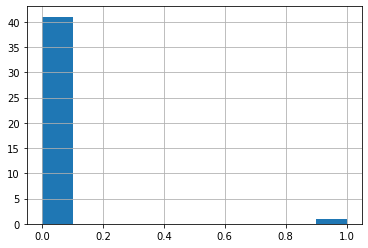

In [28]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count